In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import minmax_scale
import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('loan.csv')

In [5]:
df.size

7982

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Transformation
#### Standardization is better for dealing with outliers and distance

<AxesSubplot:>

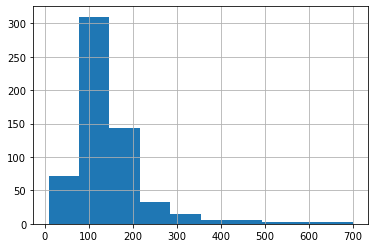

In [8]:
df['LoanAmount'].hist()

In [9]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

<AxesSubplot:>

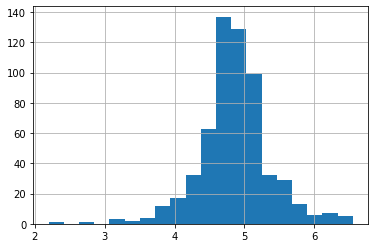

In [10]:
df['LoanAmount_log'].hist(bins=20)

In [11]:
df['Total_Income']=df['ApplicantIncome'] + df['CoapplicantIncome']

In [12]:
df['Total_Income_log']=np.log(df['Total_Income'])

<AxesSubplot:>

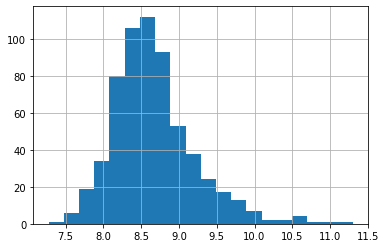

In [13]:
df['Total_Income_log'].hist(bins=20)

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['LoanAmount_log'].fillna(df['LoanAmount_log'].mean(),inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
Total_Income_log     0
dtype: int64

In [16]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

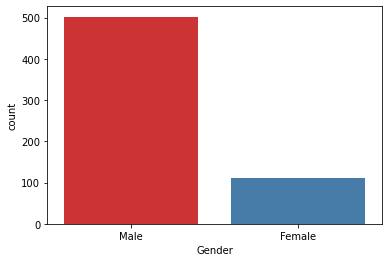

In [17]:
sns.countplot(x='Gender',data=df,palette='Set1')

### Label Encoding for categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()
LabelEncoder_y = LabelEncoder()

In [19]:
df['Gender']=LabelEncoder_x.fit_transform(df['Gender'])
df['Married']=LabelEncoder_x.fit_transform(df['Married'])
df['Education']=LabelEncoder_x.fit_transform(df['Education'])
df['Loan_Status']=LabelEncoder_x.fit_transform(df['Loan_Status'])
df['Self_Employed']=LabelEncoder_x.fit_transform(df['Self_Employed'])
df['Property_Area']=LabelEncoder_x.fit_transform(df['Property_Area'])

In [20]:
df['Dependents'] = df['Dependents'].replace('3+',3)

In [21]:
from sklearn.model_selection import train_test_split
y=df.iloc[:,12]
X=df.iloc[:,[1,2,3, 4, 5, 9,10, 11,13,15]]

# X=df.iloc[:,np.r_[1:5, 9:11,13:15]]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
df['Dependents'] = df['Dependents'].astype(int)

In [23]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [24]:
df.iloc[359,3]

3

In [25]:
df['Dependents'].dtype

dtype('int32')

In [26]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log,Total_Income_log
90,1,1,0,0,0,360.0,1.0,1,4.875197,8.675564
533,1,0,1,0,0,360.0,1.0,1,5.278115,9.328123
452,1,1,0,0,0,360.0,0.0,0,5.003946,8.644883
355,0,0,0,0,0,180.0,1.0,2,4.753590,8.246172
266,1,1,2,0,0,360.0,1.0,1,5.010635,8.715224
...,...,...,...,...,...,...,...,...,...,...
277,1,1,0,0,0,360.0,1.0,2,4.382027,8.390041
9,1,1,1,0,0,360.0,1.0,1,5.855072,10.077819
359,1,1,3,0,0,360.0,1.0,1,5.298317,9.028099
192,1,1,0,1,0,360.0,1.0,2,5.075174,8.705000


In [27]:
X_train['Married'].value_counts()

1    326
0    165
Name: Married, dtype: int64

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [29]:
X_train = ss.fit_transform(X_train)

#### Learning and Prediction

In [30]:
from sklearn.tree import DecisionTreeClassifier
dClf= DecisionTreeClassifier()

In [31]:
dClf.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
from sklearn import metrics
y_pred = dClf.predict(X_test)

In [33]:
display(metrics.accuracy_score(y_pred,y_test))

0.7317073170731707

In [44]:
#	Gender	Married	Dependents	Education	Self_Employed	Loan_Amount_Term	
#Credit_History	Property_Area	LoanAmount_log	Total_Income	Total_Income_log
a= dClf.predict([[1,1,3,0,0,0,2,300,50,10]])

In [45]:
print(a)

[1]


In [46]:
print(y[1])

0


In [37]:
if a == [1]:
    print(y[1])
else:
    print(y[0])

0
